In [ ]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Initialise data transformers
transformers=transforms.Compose([
                        transforms.ToTensor()])

In [ ]:
def data_load(train_batch_size, test_batch_size):
    train_data_loader = torch.utils.data.DataLoader(
                            datasets.MNIST(root='data',train=True,download=True, transform=transformers),
                            batch_size=train_batch_size, shuffle=True)

    test_data_loader = torch.utils.data.DataLoader(
                            datasets.MNIST(root='data',train=False,download=True, transform= transformers),
                            batch_size=test_batch_size, shuffle=True)

    return (train_data_loader,test_data_loader)

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear_1 = nn.Linear(784, 18)
        self.linear_2 = nn.Linear(18, 20)
        self.linear_3 = nn.Linear(20, 10)

    def forward(self, x):
        x = F.relu(self.linear_1(x))
        x = F.relu(self.linear_2(x))
        x = self.linear_3(x)
        return x

In [ ]:
def train_model(model, train_data, optimizer):
    model.train()
    loss_arr = []
    accuracy_arr = []
    epoch_range = 40
    total_df=pd.DataFrame()

    for epoch in range(epoch_range):
        total_loss = 0
        total_samples = 0
        correct_samples = 0
        print("Training Epoch - ",epoch+1)

        for index,(data, target) in enumerate(train_data):
            optimizer.zero_grad()
            #Transform the input
            data = data.view(-1, 784)
            prediction = model(data)

            loss = loss_func(prediction, target)
            loss.backward()
            optimizer.step()
            # Calculate the total loss for each epoch
            total_loss = total_loss + loss.data

            #Calculate the total accuracy for each epoch
            total_samples += target.size(0)
            prediction_data = np.argmax(prediction.data, axis=1)
            correct_samples += (prediction_data == target).sum().item()

        accuracy=(correct_samples/total_samples)*100

        loss_arr.append(total_loss)
        accuracy_arr.append(round(accuracy,3))
        print('Accuracy - ', accuracy)
        print('Round acc - ', round(accuracy,3))

        # Store the weights
        df = pd.DataFrame()
        for name, parameter in model.named_parameters():
            if 'weight' in name:
                ws=torch.nn.utils.parameters_to_vector(parameter).detach().numpy()
                df = pd.concat([df, pd.DataFrame(ws).T], axis = 1)

        total_df = pd.concat([total_df, df], axis = 0)

    return loss_arr, accuracy_arr, total_df

In [ ]:
train_data, test_data= data_load(1000,1000)
loss_func = nn.CrossEntropyLoss()
total_w_df=pd.DataFrame()
total_accuracy = []
total_loss = []

for i in range(8):
    print('Training loop - ', i)
    model = Model()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    loss_arr, accuracy_arr, w_df = train_model(model, train_data, optimizer)
    print('Acc - ',loss_arr)
    total_loss.extend(loss_arr)
    total_accuracy.extend(accuracy_arr)
    total_w_df = pd.concat([total_w_df, w_df], axis = 0)
    # total_w_df = total_w_df.append(w_df)

Training loop -  0
Training Epoch -  1
Accuracy -  75.405
Round acc -  75.405
Training Epoch -  2
Accuracy -  92.19166666666668
Round acc -  92.192
Training Epoch -  3
Accuracy -  93.825
Round acc -  93.825
Training Epoch -  4
Accuracy -  94.38333333333333
Round acc -  94.383
Training Epoch -  5
Accuracy -  95.01333333333334
Round acc -  95.013
Training Epoch -  6
Accuracy -  95.37
Round acc -  95.37
Training Epoch -  7
Accuracy -  95.82000000000001
Round acc -  95.82
Training Epoch -  8
Accuracy -  96.06833333333333
Round acc -  96.068
Training Epoch -  9
Accuracy -  96.33500000000001
Round acc -  96.335
Training Epoch -  10
Accuracy -  96.475
Round acc -  96.475
Training Epoch -  11
Accuracy -  96.455
Round acc -  96.455
Training Epoch -  12
Accuracy -  96.57333333333334
Round acc -  96.573
Training Epoch -  13
Accuracy -  96.585
Round acc -  96.585
Training Epoch -  14
Accuracy -  96.72666666666667
Round acc -  96.727
Training Epoch -  15
Accuracy -  96.78833333333333
Round acc -  9

# PCA

In [ ]:
df=np.array(total_w_df)
print(total_w_df.shape)
pca = PCA(n_components=2)
pca_ = pca.fit_transform(df)
pca_df=pd.DataFrame(pca_,columns=['x','y'])
print(pca_df.shape)
print(total_accuracy)
pca_df["accuracy"]=total_accuracy
pca_df["loss"]=total_loss
print(pca_df)

(320, 14672)
(320, 2)
[75.405, 92.192, 93.825, 94.383, 95.013, 95.37, 95.82, 96.068, 96.335, 96.475, 96.455, 96.573, 96.585, 96.727, 96.788, 96.89, 96.925, 97.06, 97.033, 97.273, 97.288, 97.298, 97.265, 97.303, 97.323, 97.392, 97.438, 97.572, 97.62, 97.558, 97.668, 97.737, 97.82, 97.653, 97.785, 97.863, 97.93, 97.848, 97.627, 97.742, 75.852, 91.778, 93.322, 94.405, 94.93, 95.407, 95.735, 96.047, 96.208, 96.342, 96.322, 96.628, 96.69, 96.783, 96.898, 96.953, 96.963, 96.997, 96.977, 97.307, 97.275, 97.283, 97.395, 97.34, 97.367, 97.442, 97.605, 97.463, 97.328, 97.608, 97.615, 97.593, 97.705, 97.843, 97.767, 97.757, 97.723, 97.908, 97.962, 97.79, 78.512, 92.148, 93.485, 94.385, 94.712, 95.022, 95.23, 95.55, 95.542, 95.712, 96.023, 96.15, 96.233, 96.397, 96.44, 96.553, 96.733, 96.527, 96.927, 96.865, 96.932, 96.978, 97.127, 97.157, 97.24, 97.268, 97.25, 97.42, 97.342, 97.225, 97.365, 97.528, 97.263, 97.368, 97.417, 97.585, 97.745, 97.627, 97.627, 97.785, 76.183, 92.225, 93.797, 94.627, 94.

In [ ]:
final_pca = pca_df.iloc[::3, :]
print(final_pca)

             x          y  accuracy             loss
0     5.161571  -0.679725    75.405  tensor(46.6833)
3    11.822928  -1.539385    94.383  tensor(11.5050)
6    17.608414  -2.390070    95.820   tensor(8.5677)
9    22.752127  -3.289306    96.475   tensor(7.2434)
12   27.180834  -3.951037    96.585   tensor(6.7671)
..         ...        ...       ...              ...
306   9.280525  19.921144    97.335   tensor(5.0605)
309   9.876401  21.032824    97.575   tensor(4.7109)
312  10.409535  22.017088    97.545   tensor(4.6161)
315  10.816107  22.878813    97.758   tensor(4.3078)
318  11.183921  23.605536    97.760   tensor(4.2265)

[107 rows x 4 columns]


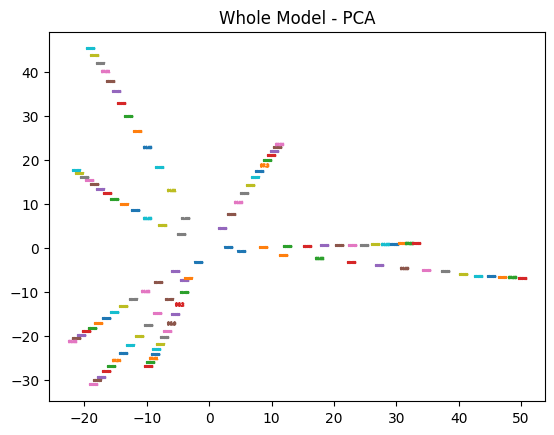

In [ ]:
for i in range(final_pca.shape[0]):
    m = list(final_pca['accuracy'])[i]
    plt.scatter(final_pca['x'][i*3], final_pca['y'][i*3], marker = f'${m}$')
    plt.title("Whole Model - PCA")

In [ ]:
layer_1 = total_w_df.iloc[ : , 0:9408]

In [ ]:
df = layer_1
df = np.array(df)
pca = PCA(n_components=2)
new_data = pca.fit_transform(df)

In [ ]:
df = pd.DataFrame(new_data, columns=['x','y'])
df['accuracy'] = total_accuracy
df['loss'] = total_loss
final_pca = df.iloc[::3, :]

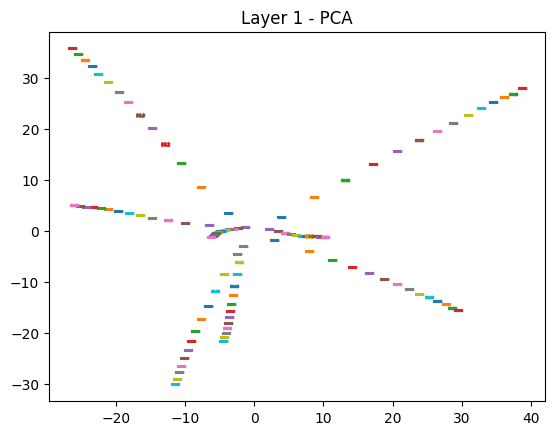

In [ ]:
for i in range(107):
    m = list(final_pca['accuracy'])[i]
    plt.scatter(final_pca['x'][i*3], final_pca['y'][i*3], marker = f'${m}$')
    plt.title("Layer 1 - PCA")

In [ ]:
param_model = Model()
total_params = sum(p.numel() for p in param_model.parameters())
print(total_params)

14720
